In [1]:
from Codes.ModelingUtils.trainer import Pipeline
pipeline = Pipeline('btc_cnn', 'CNN', batch_size=90, crop=False, update_scaler=True, weighted=True, exclude=False, l2_loss=False, log_stationary=False)

cuda
first candle in train set: 2017-08-28 16:00:00
last candle in train set: 2022-06-02 09:00:00
first candle in val set: 2022-06-02 04:15:00
last candle in val set: 2023-05-16 00:45:00
first candle in test set: 2023-05-15 20:00:00
last candle in test set: 2024-01-02 22:45:00


In [2]:
pipeline.generate_model(seed=16734, silent=False)

ConvFC(
  (conv_net): ConvNet221(
    (conv0_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0))
    (conv0_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 0), groups=8)
    (max0): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_2): Conv2d(64, 42, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (max1): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=(0, 0), dilation=1, ceil_mode=False)
    (batch1): BatchNorm2d(42, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(42, 1, kernel_size=(3, 1), stride=(3, 1))
    (batch2): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (wide): WideNet0_1(
    (layer1): Linear(in_features=26, out_features=8, bias=True)
  )
  (batch1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_ru

In [3]:
pipeline.train_model(lr=2.0e-3, weight_decay=5.5e-2, patience=2, just_load=False)


 EPOCH 1/50 	 total_train 0.4958627 	 total_test 0.4964270 	 execution time: 468

 EPOCH 2/50 	 total_train 0.4937133 	 total_test 0.4949031 	 execution time: 469

 EPOCH 3/50 	 total_train 0.4933902 	 total_test 0.4943400 	 execution time: 470

 EPOCH 4/50 	 total_train 0.4930963 	 total_test 0.4960301 	 execution time: 470

 EPOCH 5/50 	 total_train 0.4929899 	 total_test 0.4937444 	 execution time: 471

 EPOCH 6/50 	 total_train 0.4926787 	 total_test 0.4941767 	 execution time: 472

 EPOCH 7/50 	 total_train 0.4924748 	 total_test 0.4939760 	 execution time: 476


In [4]:
_ = pipeline.search_results()

 23%|██████████████████▋                                                                | 7/31 [00:00<00:00, 68.19it/s]

best of the train_val


100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 283.77it/s]

max_a:
separator: 0.06000000000000025, a return: 1208.551470095847
max_b:
separator: -0.06999999999999987, b return: 74.10938223911394
max_avg:
separator      -0.070000
val          1052.541726
test           74.109382
avg           138.469161
Name: 14, dtype: float64

best of the val_test
max_a:
separator: -0.06999999999999987, a return: 74.10938223911394
max_b:
separator: 1.942890293094024e-16, b return: 75.303037162573
max_avg:
separator    -0.080000
val          73.702771
test         69.694233
avg          71.642475
Name: 13, dtype: float64



In [5]:
_ = pipeline.fast_evaluation(0.0)

accuracy: 54.31189363995688
TPR: 54.50744708649072
AUC: 0.5592308451321852
pure_profit=75.30303716257306%  during 22264 candles(231.91666666666666 days)
MDD of model: 13.117461381861101


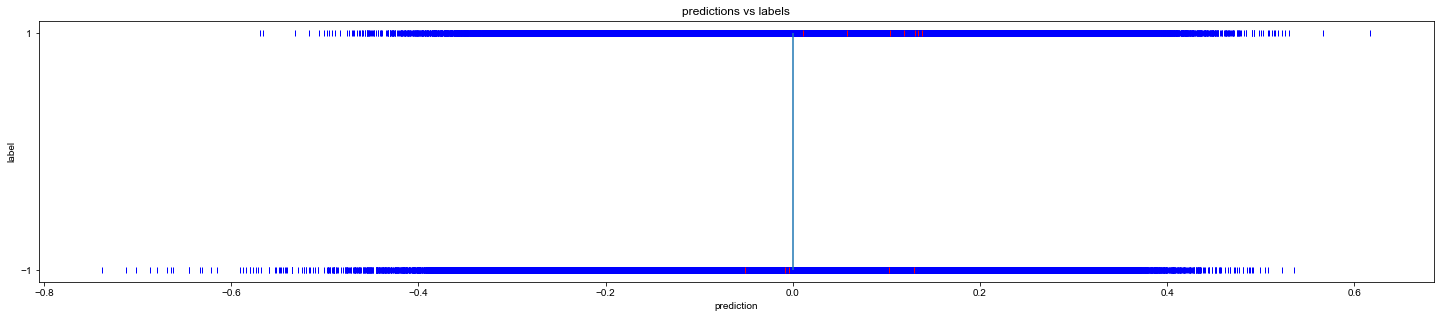

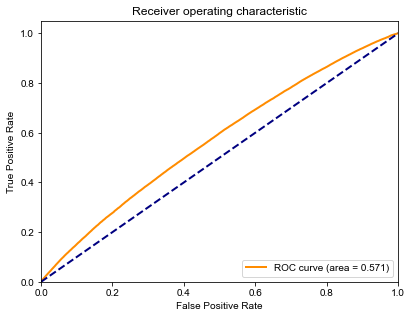

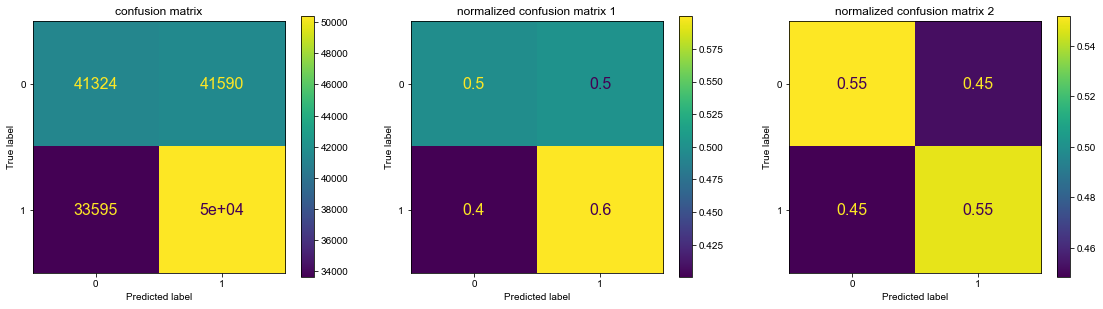

accuracy: 0.5495125736232527
pure_profit=1153.950629423757%  during 166897 candles(1738.5104166666667 days)

B&H profit: 594.711334444849
details: 


profits: avg: 1393.6023719278005, std: 666.096301065633
['  5652', '  5198', '  5418', '  5160', '  5371', '  5329', '  5033', '  4312', '  4393', '  4522']
['3259.432', '1380.851', '1043.608', '1185.131', '940.379', '1227.876', '969.911', '1791.378', '1130.781', '1006.676']

loss: avg: -1278.2073089854248, std: 587.2859397954516
['  4790', '  4340', '  4462', '  4048', '  4635', '  4221', '  3832', '  3722', '  3664', '  3876']
['-2896.50', '-1298.63', '-978.73', '-1050.40', '-913.81', '-1154.20', '-789.63', '-1677.04', '-1015.29', '-1007.84']

pure profit: avg: 115.39506294237576, std: 96.29512408517418
['  54.1%', '  54.5%', '  54.8%', '  56.0%', '  53.7%', '  55.8%', '  56.8%', '  53.7%', '  54.5%', '  53.8%']
['362.928', '82.216', '64.877', '134.728', '26.574', '73.677', '180.284', '114.342', '115.492', ' -1.17']

B&H profit: avg: 46

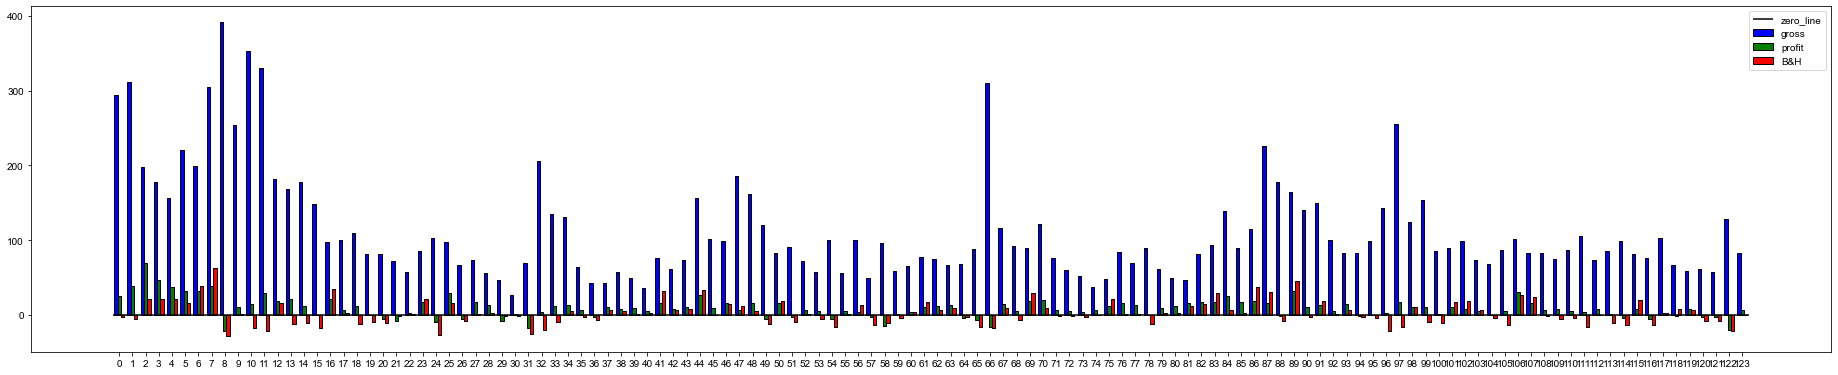

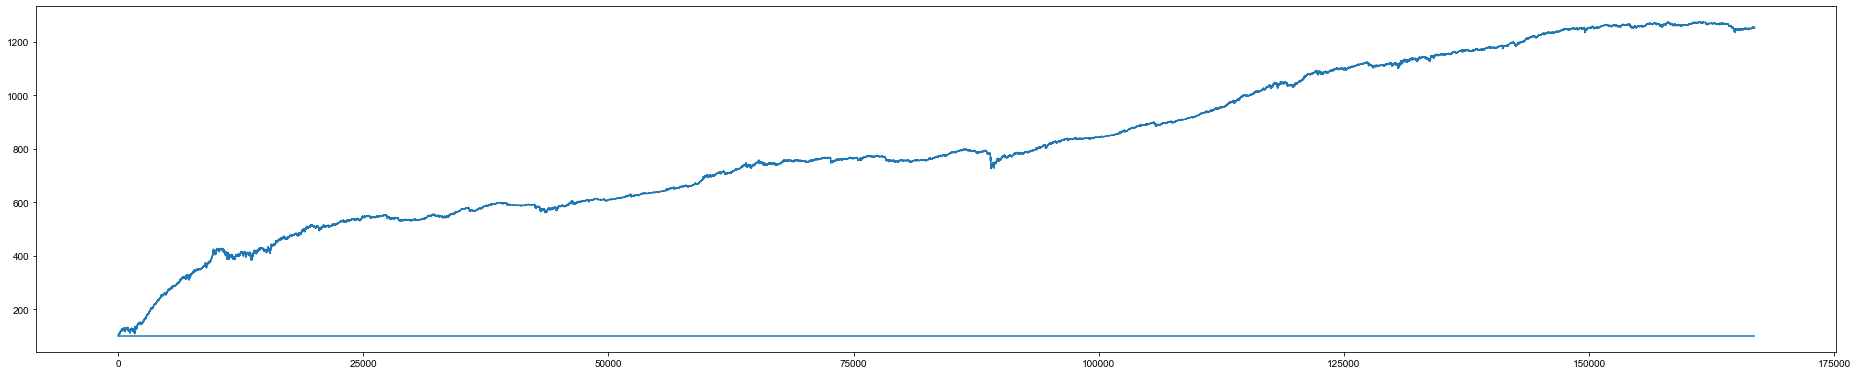

MDD of model: 17.037194560436756
MDD of B&H: 84.05823014463589
profits: avg: 112.3862508458859, std: 70.2522178322486
['   490', '   506', '   563', '   515', '   466', '   449', '   434', '   434', '   421', '   410', '   421', '   391', '   390', '   404', '   443', '   430', '   408', '   375', '   461', '   409', '   414', '   405', '   421', '   434', '   438', '   464', '   414', '   441', '   457', '   417', '   427', '   403', '   435', '   454', '   451', '   447', '   428', '   421', '   434', '   385', '   407', '   398', '   402', '   406', '   397', '   441', '   434', '   410', '   437', '   439', '   417', '   417', '   454', '   441', '   429', '   412', '   453', '   444', '   431', '   446', '   426', '   431', '   421', '   436', '   391', '   407', '   468', '   447', '   455', '   448', '   422', '   425', '   416', '   423', '   409', '   421', '   399', '   401', '   410', '   408', '   433', '   424', '   390', '   389', '   394', '   404', '   385', '   360', '

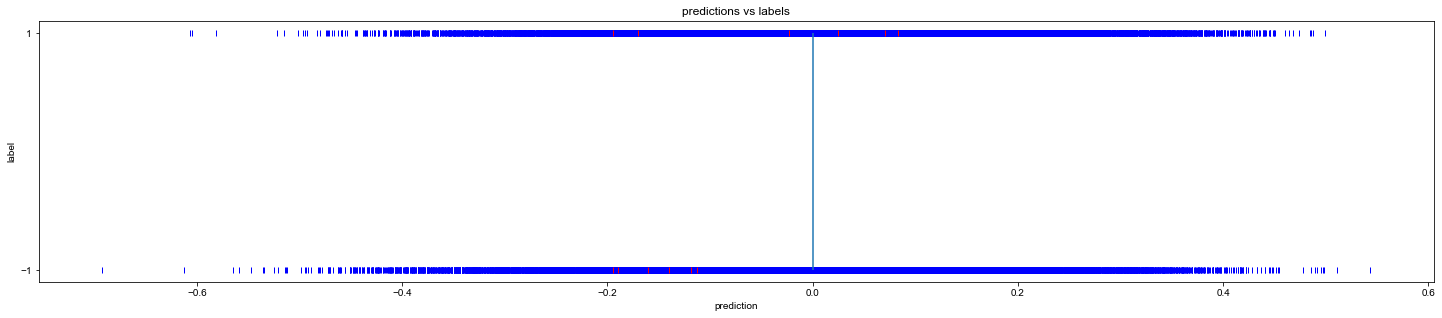

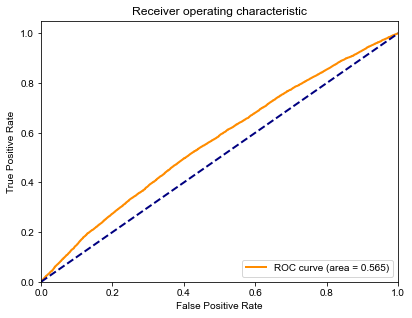

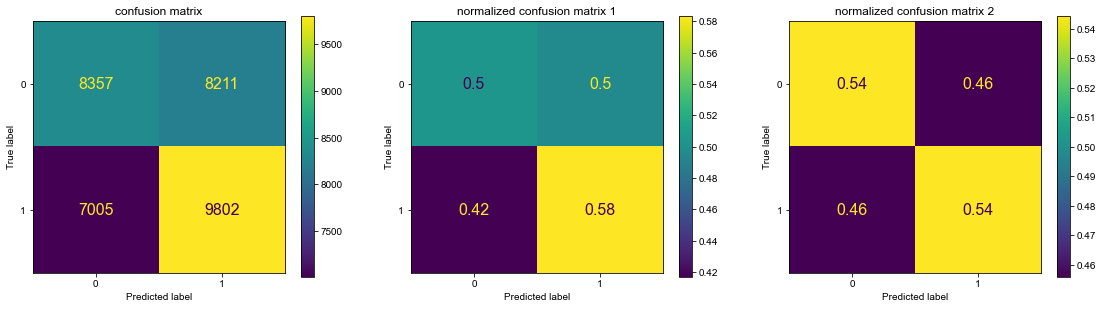

accuracy: 0.5440898876404494
pure_profit=55.64715417758457%  during 33375 candles(347.65625 days)

B&H profit: -9.190509013166354
details: 


profits: avg: 170.199307048631, std: 52.18035660405959
['  1002', '   971', '   992', '   977', '  1015', '  1020', '   975', '   945', '   968', '   937']
['289.223', '211.435', '180.663', '179.076', '181.885', '92.929', '124.723', '132.637', '178.231', '131.190']

loss: avg: -164.63459163087254, std: 61.886510448051624
['   934', '   755', '   894', '   839', '   833', '   823', '   721', '   806', '   796', '   810']
['-316.25', '-190.13', '-185.12', '-166.09', '-183.66', '-81.31', '-96.24', '-130.12', '-165.41', '-132.02']

pure profit: avg: 5.564715417758481, std: 14.779711209705662
['  51.8%', '  56.3%', '  52.6%', '  53.8%', '  54.9%', '  55.3%', '  57.5%', '  54.0%', '  54.9%', '  53.6%']
['-27.03', '21.306', ' -4.46', '12.986', ' -1.77', '11.623', '28.485', ' 2.517', '12.821', ' -0.83']

B&H profit: avg: 1.1976988315683972, std: 21.22557

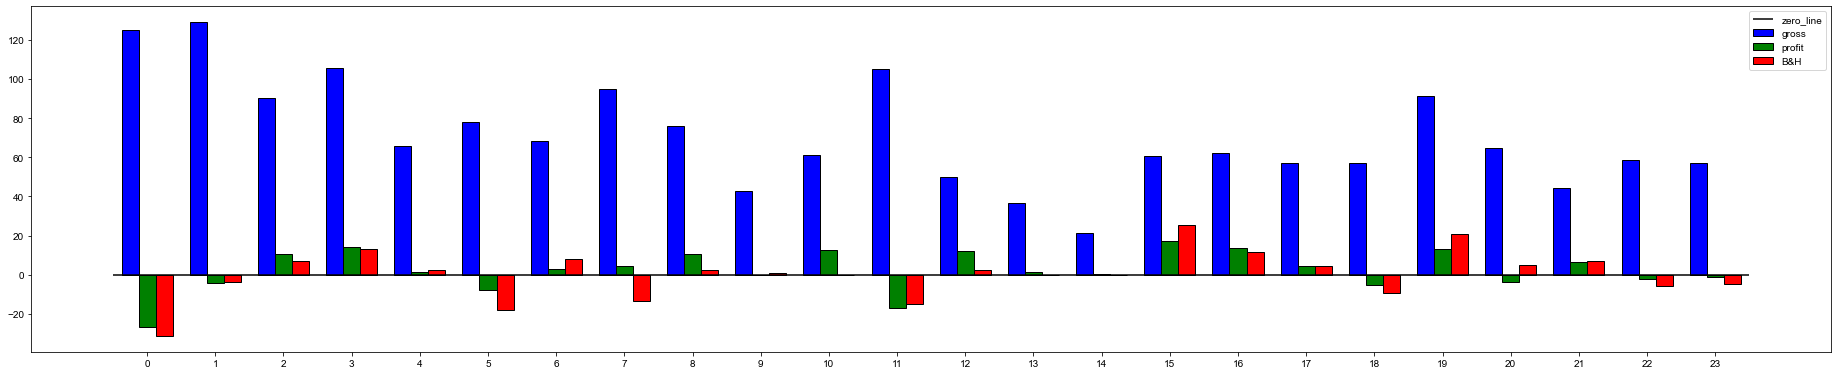

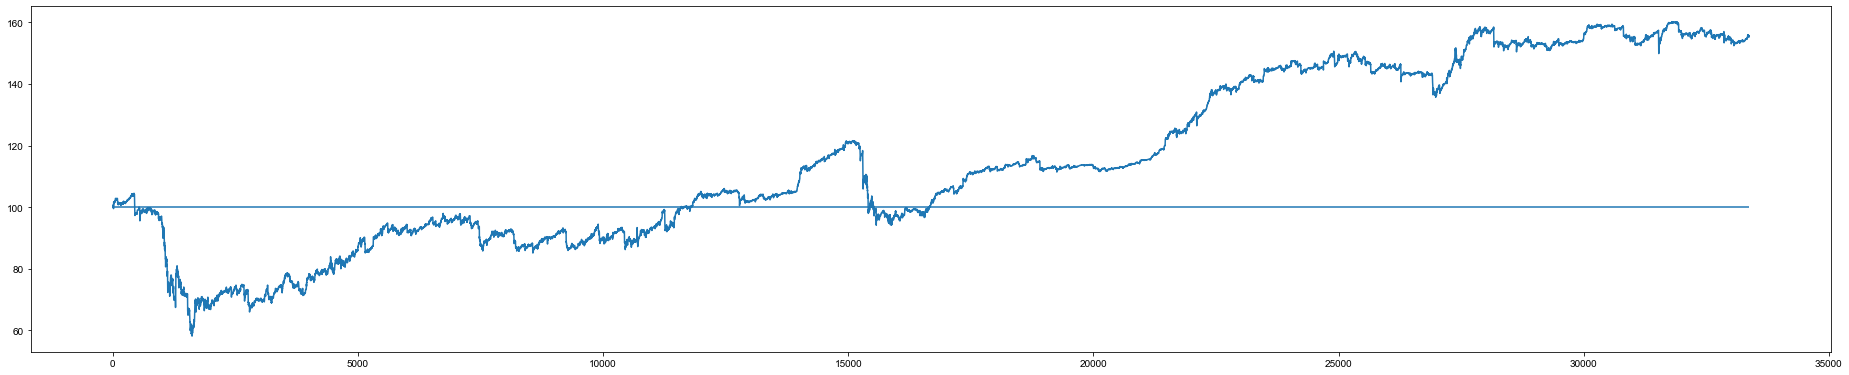

MDD of model: 44.419158298271746
MDD of B&H: 51.28069196779917
profits: avg: 70.91514927233787, std: 26.409602316683994
['   388', '   434', '   436', '   406', '   382', '   428', '   417', '   386', '   417', '   414', '   428', '   419', '   463', '   405', '   400', '   414', '   389', '   394', '   393', '   418', '   393', '   383', '   381', '   413']
['124.932', '129.150', '90.124', '105.622', '65.929', '78.050', '68.242', '94.765', '76.074', '42.652', '60.971', '104.856', '50.039', '36.565', '21.467', '60.619', '62.155', '57.160', '57.021', '91.208', '64.513', '44.491', '58.502', '56.857']

loss: avg: 68.59774651286357, std: 31.156083211097393
['   415', '   382', '   335', '   328', '   302', '   385', '   358', '   352', '   355', '   339', '   311', '   389', '   341', '   328', '   375', '   278', '   278', '   334', '   353', '   336', '   304', '   339', '   318', '   365']
['151.639', '133.512', '79.400', '91.328', '64.305', '86.099', '65.402', '90.365', '65.641', '42.8

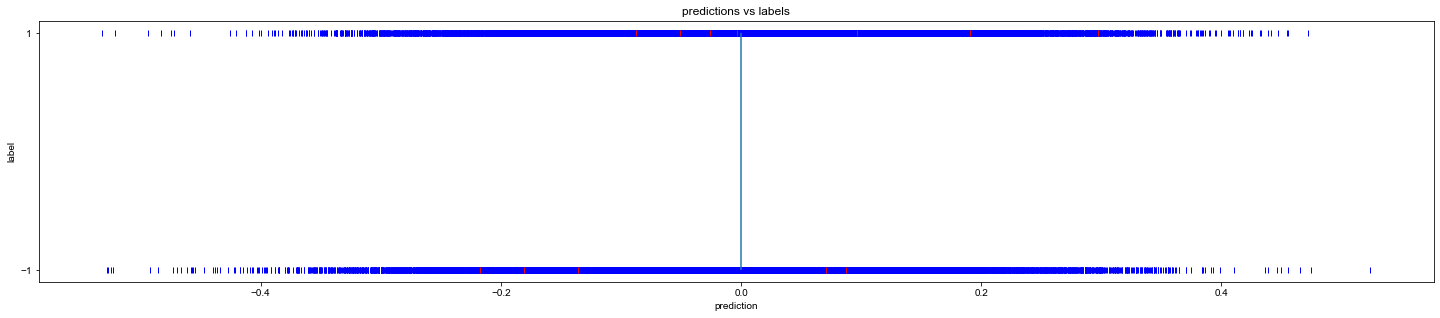

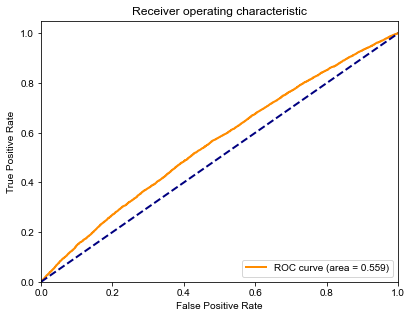

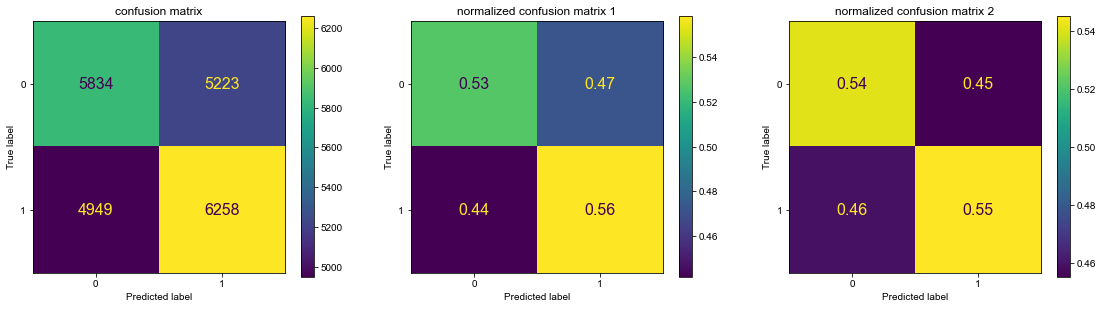

accuracy: 0.5431189363995688
pure_profit=75.303037162573%  during 22264 candles(231.91666666666666 days)

B&H profit: 65.34020986886505
details: 


profits: avg: 74.11490781793684, std: 15.19577536926566
['   656', '   649', '   589', '   592', '   668', '   655', '   669', '   607', '   602', '   571']
['72.632', '85.841', '60.872', '41.508', '69.925', '60.964', '87.292', '84.952', '84.663', '92.499']

loss: avg: -66.58460410167953, std: 12.112646215176621
['   551', '   497', '   552', '   596', '   576', '   522', '   503', '   493', '   455', '   478']
['-69.41', '-72.16', '-57.72', '-40.70', '-73.83', '-53.99', '-72.10', '-75.34', '-65.06', '-85.53']

pure profit: avg: 7.530303716257309, std: 6.789961592887949
['  54.3%', '  56.6%', '  51.6%', '  49.8%', '  53.7%', '  55.6%', '  57.1%', '  55.2%', '  57.0%', '  54.4%']
[' 3.227', '13.683', ' 3.149', ' 0.805', ' -3.91', ' 6.979', '15.189', ' 9.609', '19.604', ' 6.968']

B&H profit: avg: 5.64184416378413, std: 10.103890447811468
[' 

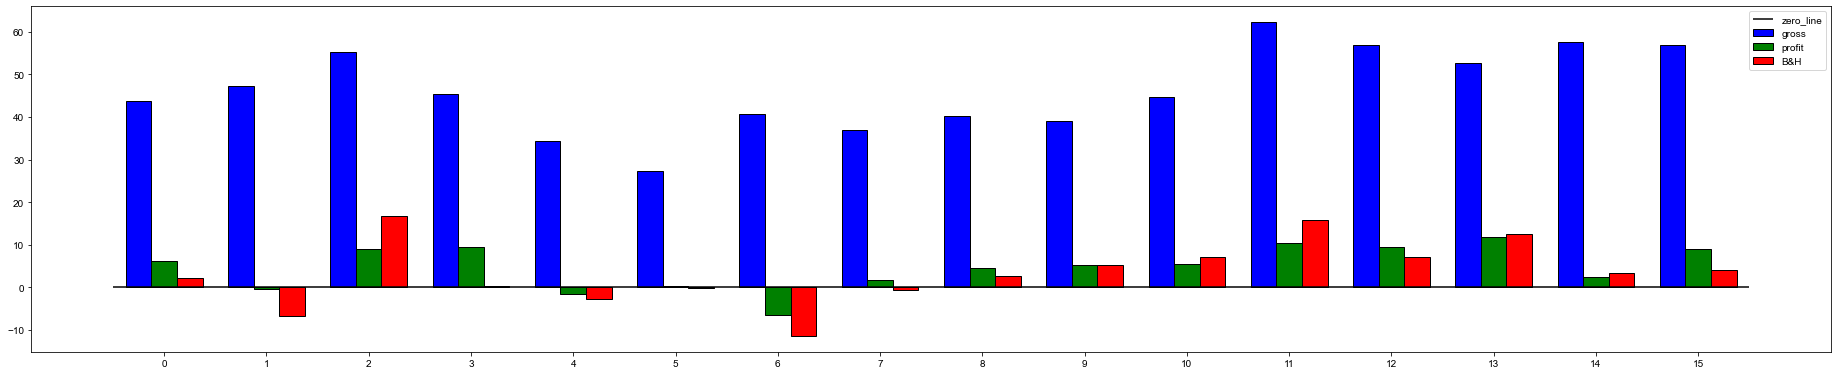

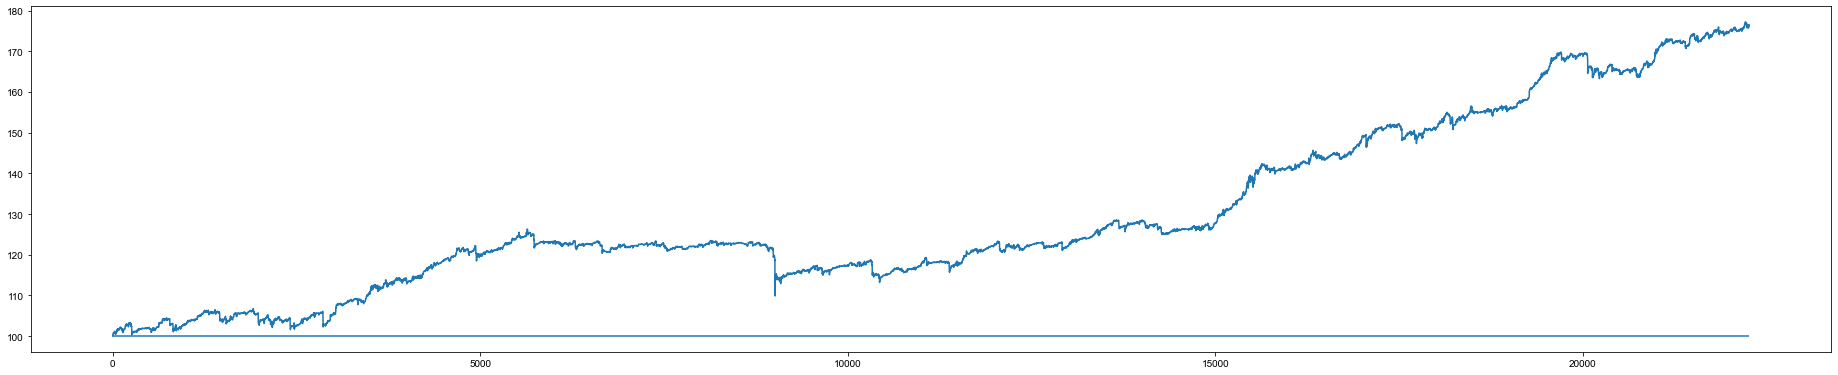

MDD of model: 13.004887086181201
MDD of B&H: 21.70530936165664
profits: avg: 46.31425518081101, std: 9.543448684791164
['   418', '   398', '   412', '   382', '   358', '   371', '   380', '   435', '   400', '   420', '   411', '   389', '   393', '   366', '   361', '   363']
['43.800', '47.192', '55.280', '45.346', '34.235', '27.259', '40.754', '36.913', '40.166', '39.031', '44.733', '62.306', '56.816', '52.602', '57.688', '56.908']

loss: avg: 41.54764476904479, std: 7.461227927500661
['   342', '   337', '   307', '   342', '   334', '   393', '   382', '   330', '   333', '   301', '   333', '   300', '   308', '   296', '   277', '   299']
['37.720', '47.663', '46.192', '35.774', '35.901', '27.059', '47.313', '35.118', '35.639', '33.874', '39.312', '51.804', '47.450', '40.844', '55.290', '47.810']

pure profit: avg: 4.766610411766223, std: 4.988738299087217
['  55.0%', '  54.1%', '  57.3%', '  52.8%', '  51.7%', '  48.6%', '  49.9%', '  56.9%', '  54.6%', '  58.3%', '  55.2%', 

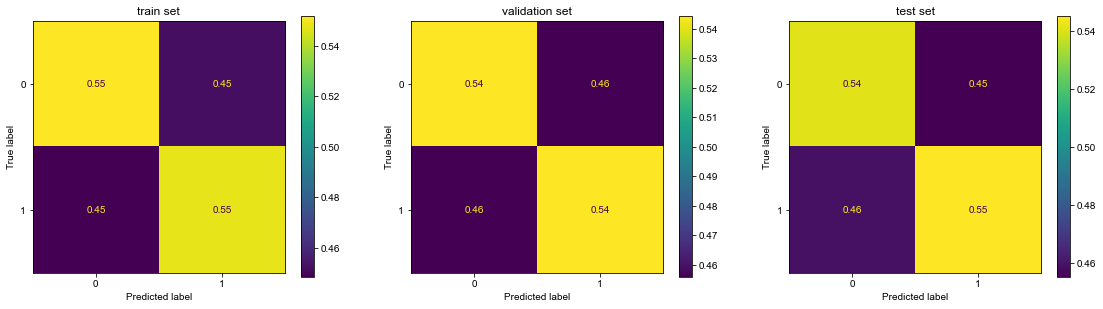

In [6]:
pipeline.generate_results(separator=0.0)

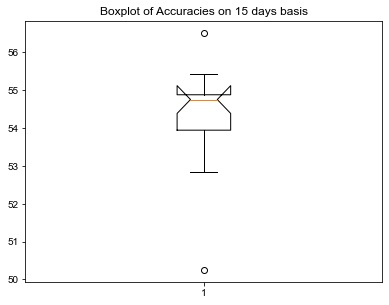

In [7]:
_ = pipeline.generate_test_stats(th=0.0, groups=16)

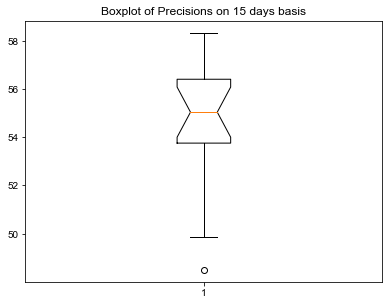

In [8]:
_ = pipeline.generate_test_stats(th=0.00, groups=16, precision=True, just_load=True)

### 